#TELECOM X LATAM - Análisis exploratorio de evación de clientes.


La empresa "TELECOM X" estÁ presentando problemas de cancelaciones de sus servicios. Por ello se necesita comprender los factores que llevan a la perdida de estos clientes.

Para ello se aplicaran los siguientes metodos:



*   Manupulación de datos desde la base de datos proporcionada por el cliente.
*   Aplicación de los conceptos de ETL (extracción, transformación y Caga) en la preparación de los datos.
*   Creación de visualizaciónes estrategicas qeu identifiquen los patrones y tendencencias segun la información recopilada.
*   Por ultimo un análisis Exploratorio de datos e informe con insights relevantes.





## EXTRACCIÓN

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [93]:
df_general = pd.read_json('/content/drive/MyDrive/ALURA/CHALLENGE_2/TelecomX_Data.json')
df_general.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [94]:
# Normalizar las columnas anidadas
inicial_df = df_general[['customerID','Churn']]
customer_df = pd.json_normalize(df_general['customer'], sep='_')
phone_df = pd.json_normalize(df_general['phone'], sep='_')
internet_df = pd.json_normalize(df_general['internet'], sep='_')
account_df = pd.json_normalize(df_general['account'], sep='_')


In [95]:
# Concatenar todos los DataFrames normalizados en uno solo
df = pd.concat([inicial_df, customer_df, phone_df, internet_df, account_df], axis=1)

# Mostrar las primeras filas del DataFrame normalizado
df.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


## TRANSFORMACIÓN

\**`Diccionario de datos`**

*   `customerID:` número de identificación único de cada cliente
*   `Churn:` si el cliente dejó o no la empresa
*   `gender:` género (masculino y femenino)
*   `SeniorCitizen:` información sobre si un cliente tiene o no una edad igual o mayor a 65 años
*   `Partner:` si el cliente tiene o no una pareja
*   `Dependents:` si el cliente tiene o no dependientes
*   `tenure:` meses de contrato del cliente
*   `PhoneService:` suscripción al servicio telefónico
*   `MultipleLines:` suscripción a más de una línea telefónica
*   `InternetService:` suscripción a un proveedor de internet
*   `OnlineBackup:` suscripción adicional de respaldo en línea
*   `DeviceProtection:` suscripción adicional de protección del dispositivo
*   `TechSupport:` suscripción adicional de soporte técnico, menor tiempo de espera
*   `StreamingTV:` suscripción de televisión por cable
*   `StreamingMovies:` suscripción de streaming de películas
*   `Contract:` tipo de contrato
*   `PaperlessBilling:` si el cliente prefiere recibir la factura en línea
*   `PaymentMethod:` forma de pago
*   `Charges_Monthly:` total de todos los servicios del cliente por mes
*   `Charges_Total:` total gastado por el cliente

In [96]:
#Para mejor reconocimiento, se cambiaron los nombres:

df.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'abandono',
    'gender': 'genero',
    'SeniorCitizen': 'ciudadano_mayor',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_hijos',
    'tenure': 'meses_en_empresa',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges_Monthly': 'cargos_mensuales',
    'Charges_Total': 'cargos_totales'}, inplace=True)

df.head()

,id_cliente,abandono,genero,ciudadano_mayor,tiene_pareja,tiene_hijos,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   ciudadano_mayor         7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_hijos             7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [113]:
#verificando errores de formato
for col in ['id_cliente', 'abandono', 'genero', 'ciudadano_mayor',
       'tiene_pareja', 'tiene_hijos', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales']:
    print(f"Valores únicos para la columna '{col}':")
    print(df[col].unique())
    print("-" * 20)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'abandono':
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
--------------------
Valores únicos para la columna 'ciudadano_mayor':
[0 1]
--------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
--------------------
Valores únicos para la columna 'tiene_hijos':
['Yes' 'No']
--------------------
Valores únicos para la columna 'meses_en_empresa':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'servicio_telefonico':
['Yes' 'No']
--------------------
Valores únicos para la columna 'lineas_multiples':
['No' 'Yes' 'No 

### Limpieza de los datos en texto

In [110]:
#limpieza columna id del cliente
df['id_cliente'] = df['id_cliente'].str.strip()

#limpieza de la columna tipo_contrato
df['tipo_contrato'] = df['tipo_contrato'].str.replace(r'-', ' ', regex=True).str.strip().str.lower()

#liempaza de la columna metodo_pago
df['metodo_pago'] = df['metodo_pago'].str.replace('automatic', '', regex=True).str.strip().str.lower().replace('\(\)', '', regex=True).str.strip()


In [114]:
df['id_cliente'].sample(4)

,id_cliente
7100,9777-IQHWP
3776,5180-UCIIQ
4328,5944-UGLLK
4902,6701-YVNQG


### Limpieza de los datos númericos


In [115]:
#Eliminando los espacios del la columna cargos totales
df['cargos_totales'] = df['cargos_totales'].replace(' ', np.nan)

In [116]:
#Convirtiendo tipo de datos en en float:
df['cargos_totales'] = pd.to_numeric(df['cargos_totales'], errors='coerce')
df['cargos_totales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: cargos_totales
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [117]:
df['cargos_totales'].isna().sum()

np.int64(11)

In [118]:
# Eliminar registros con cargos_totales faltantes
df = df.dropna(subset=['cargos_totales'])

# Verificación rápida
print(f"Número de registros después de limpieza: {len(df)}")

Número de registros después de limpieza: 7256


In [119]:
col_binario = ['abandono','tiene_pareja', 'tiene_hijos', 'servicio_telefonico', 'factura_electronica']

for col in col_binario:
    df[col] = df[col].map({'Yes': 1, 'No': 0, '': np.nan}).fillna(0).astype(np.int64)

In [120]:
df['abandono'].sample(20)

,abandono
929,1
6031,1
6413,0
1141,0
2528,0
1050,0
149,0
6478,0
1899,1
5540,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   ciudadano_mayor         7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_hijos             7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int64  
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_streaming            7256 non-null   objec

## CARGA Y ANÁLISIS

In [122]:
#creando la columna cuentas_diarias
df['cuentas_diarias'] = df['cargos_mensuales']/30
df[['cargos_mensuales', 'cuentas_diarias']].sample(4)

,cargos_mensuales,cuentas_diarias
6014,108.75,3.625000
5187,98.75,3.291667
2927,51.05,1.701667
4693,78.60,2.620000


In [123]:
#descripción de lo datos
df.describe()

,abandono,ciudadano_mayor,tiene_pareja,tiene_hijos,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


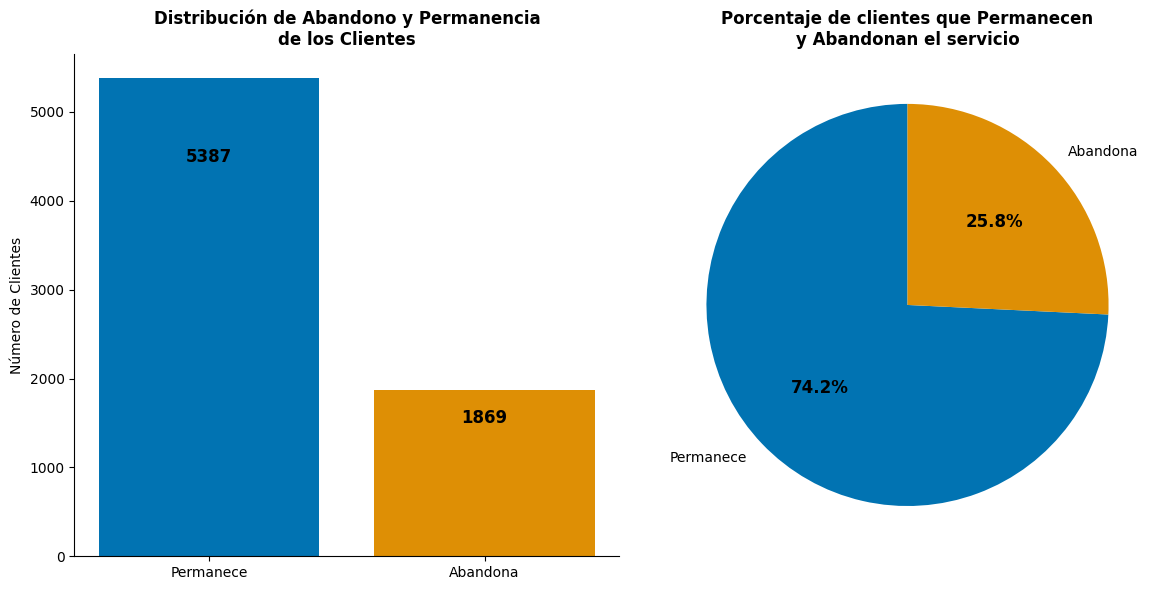

In [221]:
# se usara la paleta de colores de "colorblind"
abandono_counts = df["abandono"].value_counts().sort_index()
abandono_props = df["abandono"].value_counts(normalize=True).sort_index()
labels = ["Permanecen", "Abandonan"]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
colors = sns.color_palette("colorblind")

# Gráfico de barras
bars = axs[0].bar(
    abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    abandono_counts.values,
    color=colors
)

for ax in axs.flat:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

axs[0].set_title('Distribución de Abandono y Permanencia\nde los Clientes', fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Número de Clientes')

# Texto dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height /1.2,
        f'{height:.0f}',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black')

axs[0].grid(False)

#gráfico de pastel
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    autopct=custom_autopct,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10})


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Porcentaje de clientes que Permanecen\ny Abandonan el servicio', fontsize=12, weight='bold', loc='center')

#Para exportar graficos
fig.savefig('/content/drive/MyDrive/ALURA/CHALLENGE_2/Abandono_permanencia_clientes.png',
            transparent= False, dpi = 300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [132]:
# Función auxiliar para ver distribución de abandono por cada categoría
def analizar_evasion_por_categoria(df, columna):
    cruzado = pd.crosstab(df[columna], df['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Variables categóricas a analizar
categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'tipo_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = analizar_evasion_por_categoria(df, cat)


Análisis para: genero
        % No Abandono  % Abandono
genero                           
Female      73.822135   26.177865
Male        74.652494   25.347506

Análisis para: tipo_contrato
                % No Abandono  % Abandono
tipo_contrato                            
month to month      58.676654   41.323346
one year            89.064559   10.935441
two year            97.230237    2.769763

Análisis para: metodo_pago
                  % No Abandono  % Abandono
metodo_pago                                
bank transfer         83.742911   16.257089
credit card           85.194639   14.805361
electronic check      56.196319   43.803681
mailed check          81.412191   18.587809

Análisis para: tipo_internet
               % No Abandono  % Abandono
tipo_internet                           
DSL                81.514297   18.485703
Fiber optic        59.443402   40.556598
No                 92.825397    7.174603


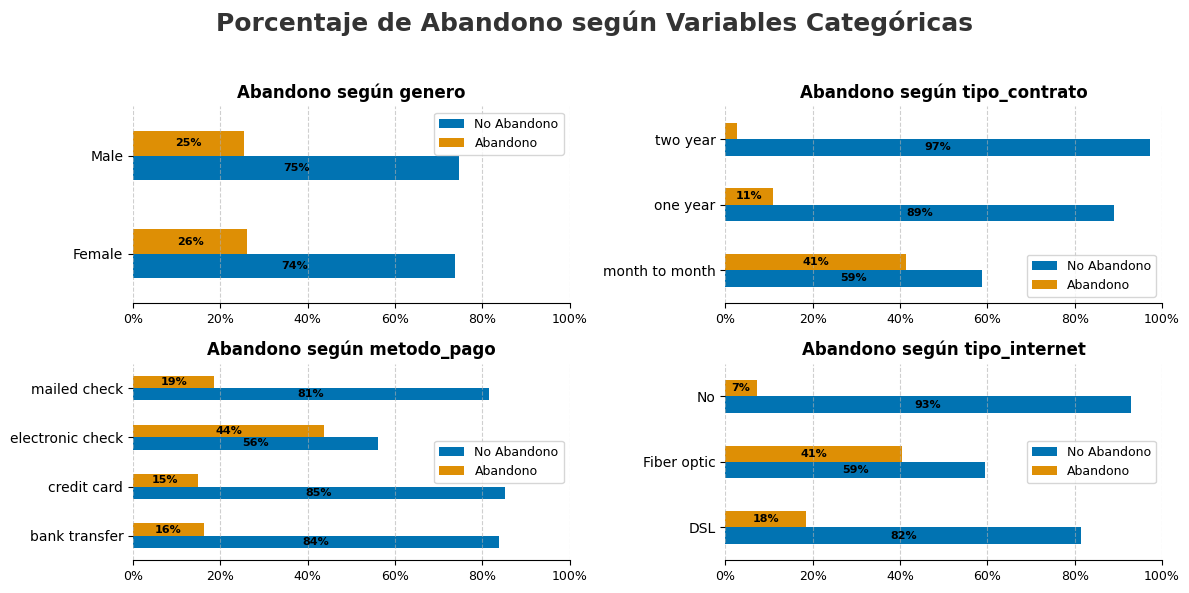

In [220]:
# Preparar subplots
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2,
                         ncols=2, figsize=(12, 6))
axes = axes.flatten()
colors = sns.color_palette("colorblind")

for i, cat in enumerate(categoricas):
    cruzado = pd.crosstab(df[cat], df['abandono'], normalize='index')
    ax = axes[i]

    cruzado.plot(kind='barh', ax=ax, color=colors)

    # Formato del eje x
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('')
    ax.set_title(f'Abandono según {cat}', fontsize=12, fontweight='bold')
    ax.legend(['No Abandono', 'Abandono'], fontsize=9)

    # Estilo profesional
    ax.tick_params(axis='x', labelsize=9)
    ax.xaxis.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    # Agregar los porcentajes dentro de las barras
    for container in ax.containers:
        for rect in container:
            width = rect.get_width()
            y = rect.get_y() + rect.get_height() / 2
            if width > 0.03:  # evitar superposición si el valor es muy pequeño
                ax.text(width / 2, y, f'{width:.0%}',
                        ha='center', va='center', color='black', fontsize=8, fontweight='bold')

# Título general
plt.suptitle('Porcentaje de Abandono según Variables Categóricas',
             fontsize=18, weight='bold', color='#333333')

#Para exportar graficos
fig.savefig('/content/drive/MyDrive/ALURA/CHALLENGE_2/Porcentaje_abandono_segun_categoria.png',
            transparent= False, dpi = 300, bbox_inches='tight')

# Ajustar distribución
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [141]:
binarias = ['ciudadano_mayor', 'tiene_pareja', 'tiene_hijos', 'servicio_telefonico', 'factura_electronica']
def analizar_evasion_binarias(df, columna):
    # Mapeo opcional para mejor legibilidad (0 = No, 1 = Sí)
    df_temp = df.copy()
    df_temp[columna] = df_temp[columna].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[columna], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']

    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Resultados por columna binaria
resultados_binarios = {}
for col in binarias:
    resultados_binarios[col] = analizar_evasion_binarias(df, col)


Análisis para: ciudadano_mayor
                 % No Abandono  % Abandono
ciudadano_mayor                           
No                   77.066184   22.933816
Sí                   59.729272   40.270728

Análisis para: tiene_pareja
              % No Abandono  % Abandono
tiene_pareja                           
No                67.974380   32.025620
Sí                80.934739   19.065261

Análisis para: tiene_hijos
             % No Abandono  % Abandono
tiene_hijos                           
No               69.661817   30.338183
Sí               84.976959   15.023041

Análisis para: servicio_telefonico
                     % No Abandono  % Abandono
servicio_telefonico                           
No                       75.886525   24.113475
Sí                       74.065028   25.934972

Análisis para: factura_electronica
                     % No Abandono  % Abandono
factura_electronica                           
No                       84.090909   15.909091
Sí                    

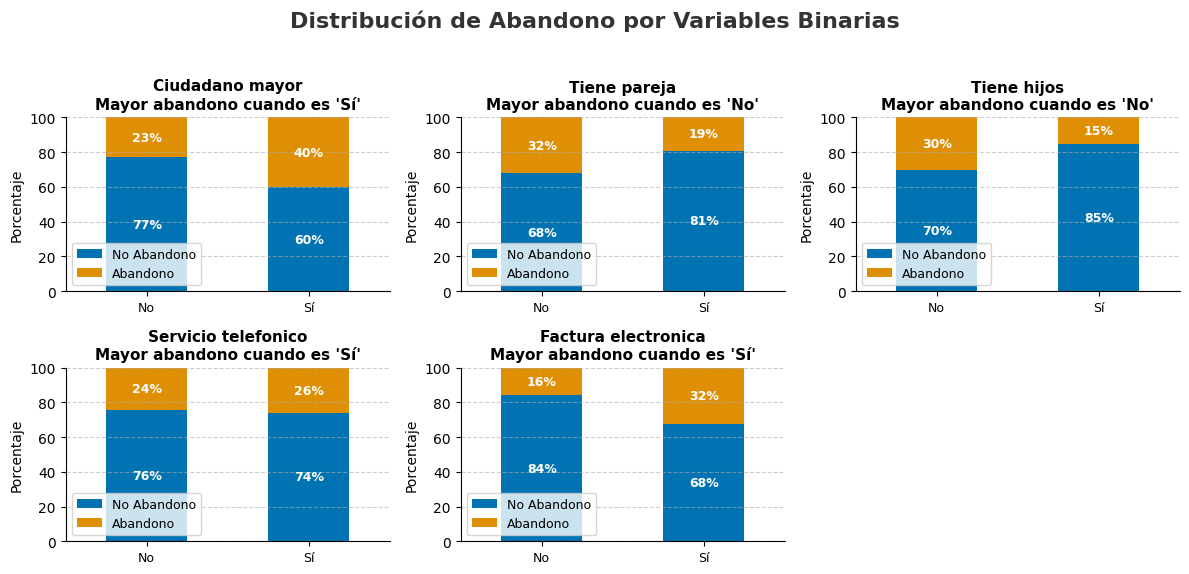

In [218]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()
colors = sns.color_palette("colorblind")

for idx, col in enumerate(binarias):
    df_temp = df.copy()
    df_temp[col] = df_temp[col].map({1: 'Sí', 0: 'No'})

    # Tabla de frecuencia relativa
    cruzado = pd.crosstab(df_temp[col], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['No Abandono', 'Abandono']

    # Determinar insight clave
    abandono_si = cruzado.loc['Sí', 'Abandono'] if 'Sí' in cruzado.index else 0
    abandono_no = cruzado.loc['No', 'Abandono'] if 'No' in cruzado.index else 0
    if abandono_si > abandono_no:
        insight = f"Mayor abandono cuando es 'Sí'"
    elif abandono_si < abandono_no:
        insight = f"Mayor abandono cuando es 'No'"
    else:
        insight = "Tasa de abandono similar en ambos grupos"

    # Graficar
    ax = axes[idx]
    cruzado.plot(kind='bar', stacked=True, color=colors, ax=ax)

    # Título con insight
    ax.set_title(f"{col.replace('_', ' ').capitalize()}\n{insight}",
                 fontsize=11, fontweight='bold')

    # Estética
    ax.set_ylabel('Porcentaje')
    ax.set_xlabel('')
    ax.set_ylim(0, 100)
    ax.legend(loc='best', fontsize=9)
    ax.tick_params(axis='x', rotation=0, labelsize=9)
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Etiquetas dentro de las barras
    for p in ax.patches:
        height = p.get_height()
        if height > 3:
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            ax.text(x, y, f'{height:.0f}%', ha='center', va='center',
                    fontsize=9, color='white', weight='bold')

# Eliminar subplots vacíos
if len(binarias) < len(axes):
    for j in range(len(binarias), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Distribución de Abandono por Variables Binarias',
             fontsize=16, weight='bold', color='#333333')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#Para exportar graficos
fig.savefig('/content/drive/MyDrive/ALURA/CHALLENGE_2/Distribucion_abandono_porvariablesbinarias.png',
            transparent= False, dpi = 300, bbox_inches='tight')

plt.show()

In [206]:
def graficar_abandono_numericas_subplots(df, columnas, bins=5):
    rows = 2
    cols = 2
    fig = make_subplots(rows=rows, cols=cols,
                        subplot_titles=[col.replace('_', ' ').capitalize() for col in columnas])

    for idx, col in enumerate(columnas):
        df_temp = df.copy()

        # Crear rangos con qcut ordenados
        df_temp[f'{col}_bin'] = pd.qcut(df_temp[col], q=bins, duplicates='drop')
        df_temp[f'{col}_bin'] = pd.Categorical(df_temp[f'{col}_bin'], ordered=True)

        # Calcular porcentaje de abandono por rango
        resumen = df_temp.groupby(f'{col}_bin', observed=True)['abandono'].mean().reset_index()
        resumen['porcentaje_abandono'] = resumen['abandono'] * 100
        resumen['rango'] = resumen[f'{col}_bin'].astype(str)

        # Posición del subplot
        row = idx // cols + 1
        col_pos = idx % cols + 1

        # Agregar gráfico al subplot
        fig.add_trace(
            go.Bar(
                x=resumen['rango'],
                y=resumen['porcentaje_abandono'],
                text=[f'{v:.1f}%' for v in resumen['porcentaje_abandono']],
                textposition='outside',
                marker_color='#ff6f69',
                name=col.replace('_', ' ')
            ),
            row=row,
            col=col_pos
        )

    # Diseño general del gráfico
    fig.update_layout(
        height=600,
        width=1000,
        title_text="Porcentaje de Abandono según Rangos de Variables Numéricas",
        title_font_size=18,
        showlegend=False,
        template='plotly_white',
        margin=dict(t=70)
    )

    # Ajuste de ejes en todos los subplots
    fig.update_yaxes(title_text='% Abandono', range=[0, 100])
    fig.update_xaxes(tickangle=-45)

    fig.show()
    return fig

# Llamada a la función
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
fig_result = graficar_abandono_numericas_subplots(df, numericas, bins=4)


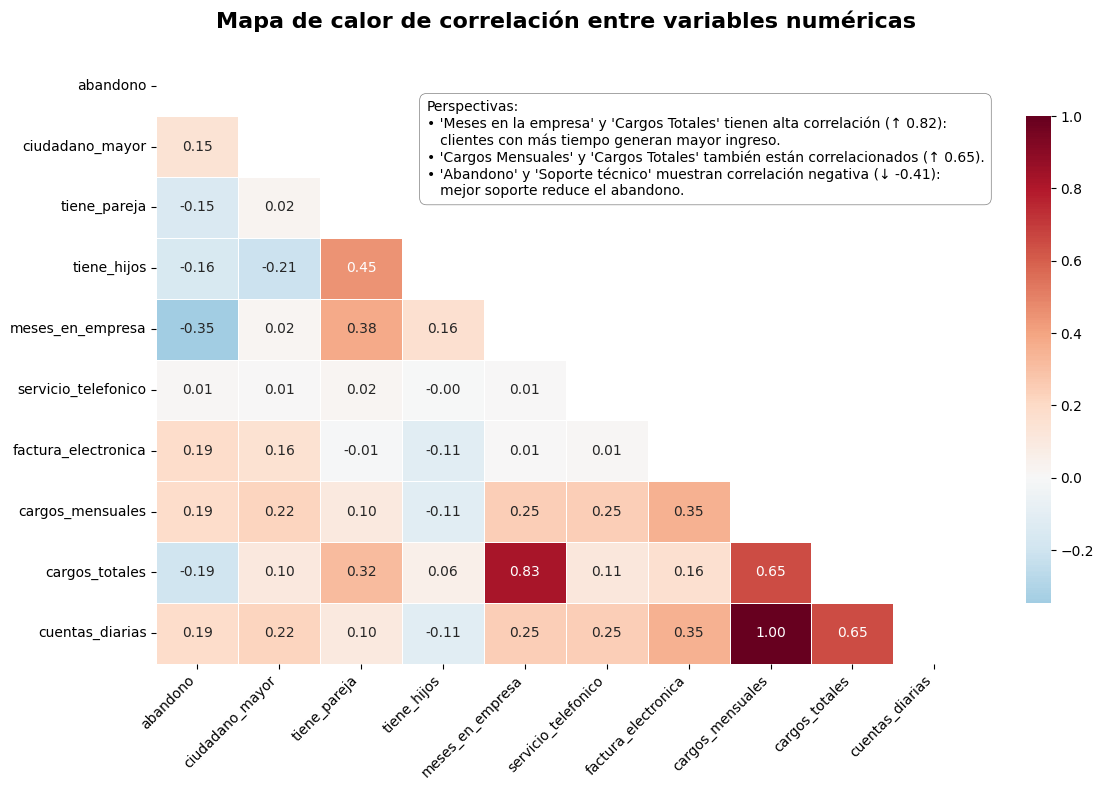

In [207]:
# Matriz de correlación
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear figura
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

# Título
plt.title("Mapa de calor de correlación entre variables numéricas", fontsize=16, weight='bold', pad=20)

# 🔍 Insights agregados en la posición (6,10)
insights = (
    "Perspectivas:\n"
    "• 'Meses en la empresa' y 'Cargos Totales' tienen alta correlación (↑ 0.82):\n"
    "   clientes con más tiempo generan mayor ingreso.\n"
    "• 'Cargos Mensuales' y 'Cargos Totales' también están correlacionados (↑ 0.65).\n"
    "• 'Abandono' y 'Soporte técnico' muestran correlación negativa (↓ -0.41):\n"
    "   mejor soporte reduce el abandono."
)

# Agrega los insights dentro del gráfico en una posición visible (ajustada)
plt.text(3.3, 1.5, insights, fontsize=10, ha='left', va='center_baseline', bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", lw=0.5))

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

#Para exportar graficos
plt.savefig('/content/drive/MyDrive/ALURA/CHALLENGE_2/Mapa_calor.png',
            transparent= False, dpi = 300, bbox_inches='tight')

plt.show()

## 📊 Informe de Análisis de Variables y Abandono de Clientes

### 🧾 Introducción
El presente análisis tiene como objetivo identificar patrones en los datos de clientes de una empresa de telecomunicaciones, con especial énfasis en el abandono del servicio (churn). A través de diversas visualizaciones y técnicas estadísticas, se busca comprender qué variables influyen en mayor medida en la decisión de los clientes de abandonar el servicio, con el fin de proponer estrategias preventivas y de fidelización.

### 🧹 Limpieza y Preparación de los Datos

Previo al análisis exploratorio, se realizaron las siguientes acciones:

*   Conversión de variables binarias: Las variables con valores 0 y 1 fueron transformadas a formato categórico ("Sí" / "No") para facilitar su interpretación visual.
*   Conversión de tipos de datos: Se aseguraron los formatos correctos.
*   Normalización en cruces de variables: Se aplicó normalize='index' en tablas cruzadas para visualizar los porcentajes respecto a cada categoría.

### 📊 Visualizaciones Generadas y Análisis

#### 1. Distribución de Clientes que Permanecen vs. Abandonan

*   El gráfico de barras muestra que una mayoría de clientes permanece en la compañía, aunque existe un grupo significativo que abandona el servicio.
*   En el gráfico circular (pastel), se observa visualmente que aproximadamente 74.2% permanece y 25.8% abandona, lo que refuerza la necesidad de analizar qué factores contribuyen al churn.

Insight: Aunque el porcentaje de abandono no supera al de permanencia, el volumen es lo suficientemente considerable como para que merezca atención estratégica.

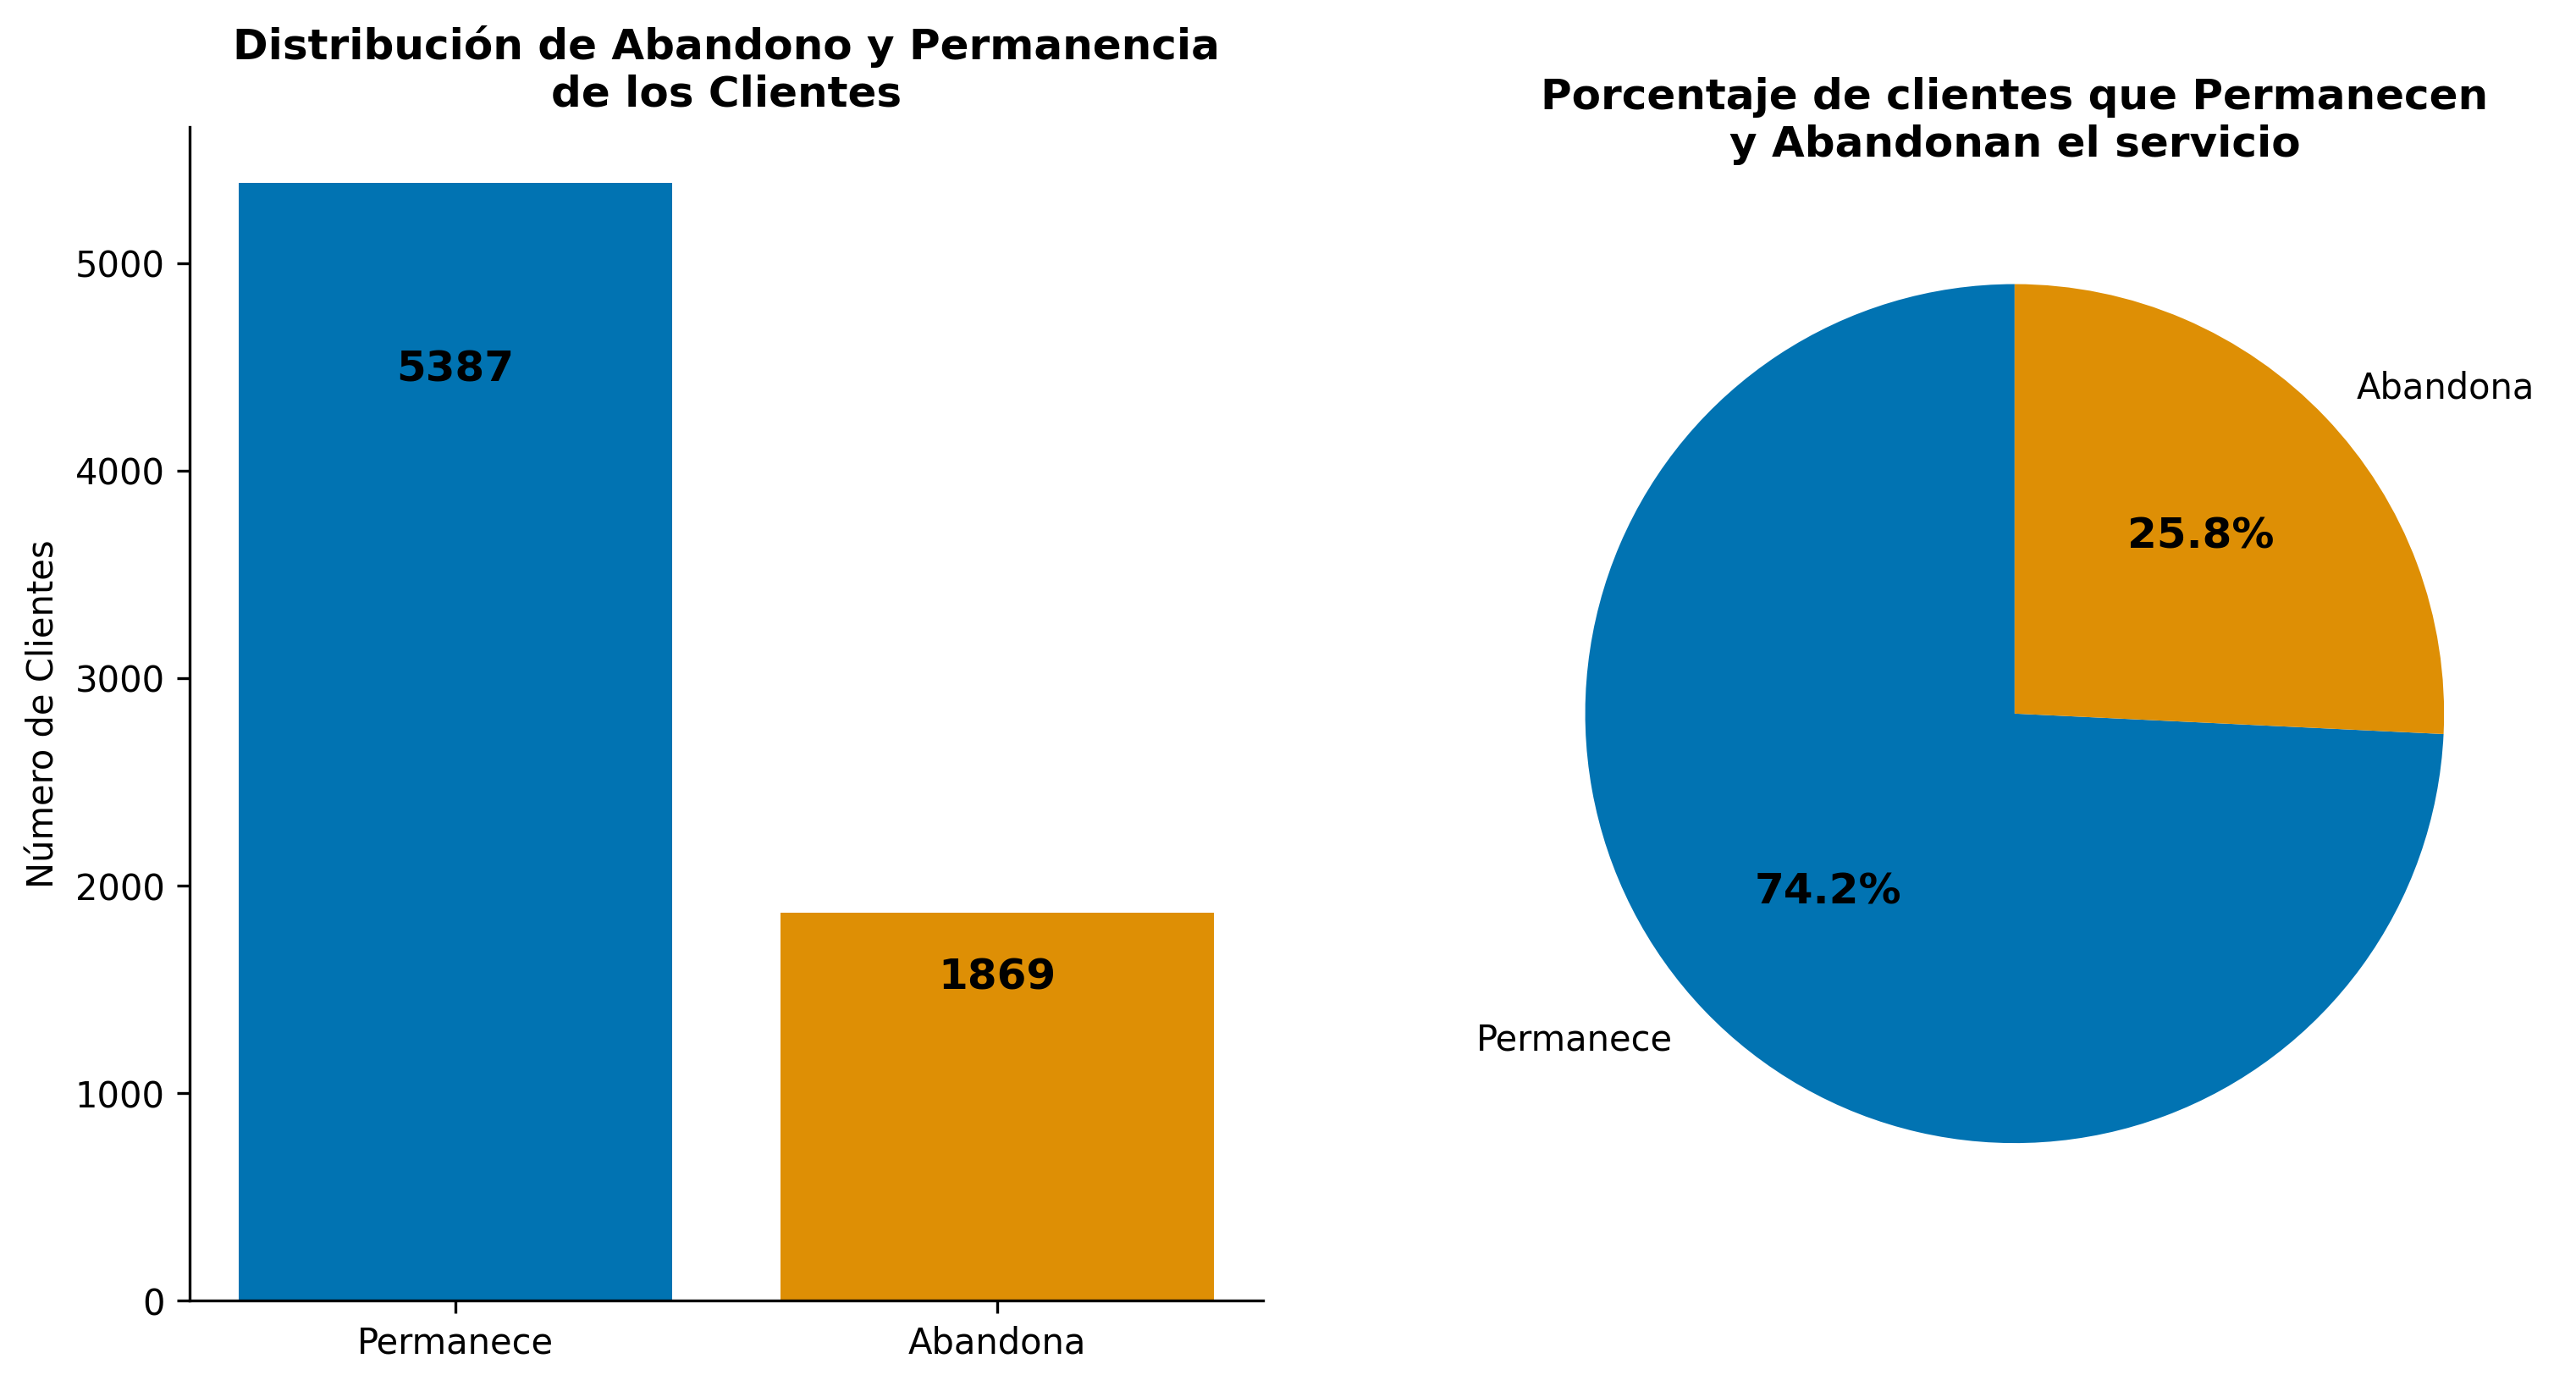

In [222]:
# @title Distribución de abandono y permanencia: totales y porcentaje
from IPython.display import Image
Image('/content/drive/MyDrive/ALURA/CHALLENGE_2/Abandono_permanencia_clientes.png')

#### 2. Porcentaje de abandono según variables categóricas

Se analizaron variables como abandono según genero, tipo_contrato, metodo_pago y tipo de internet:



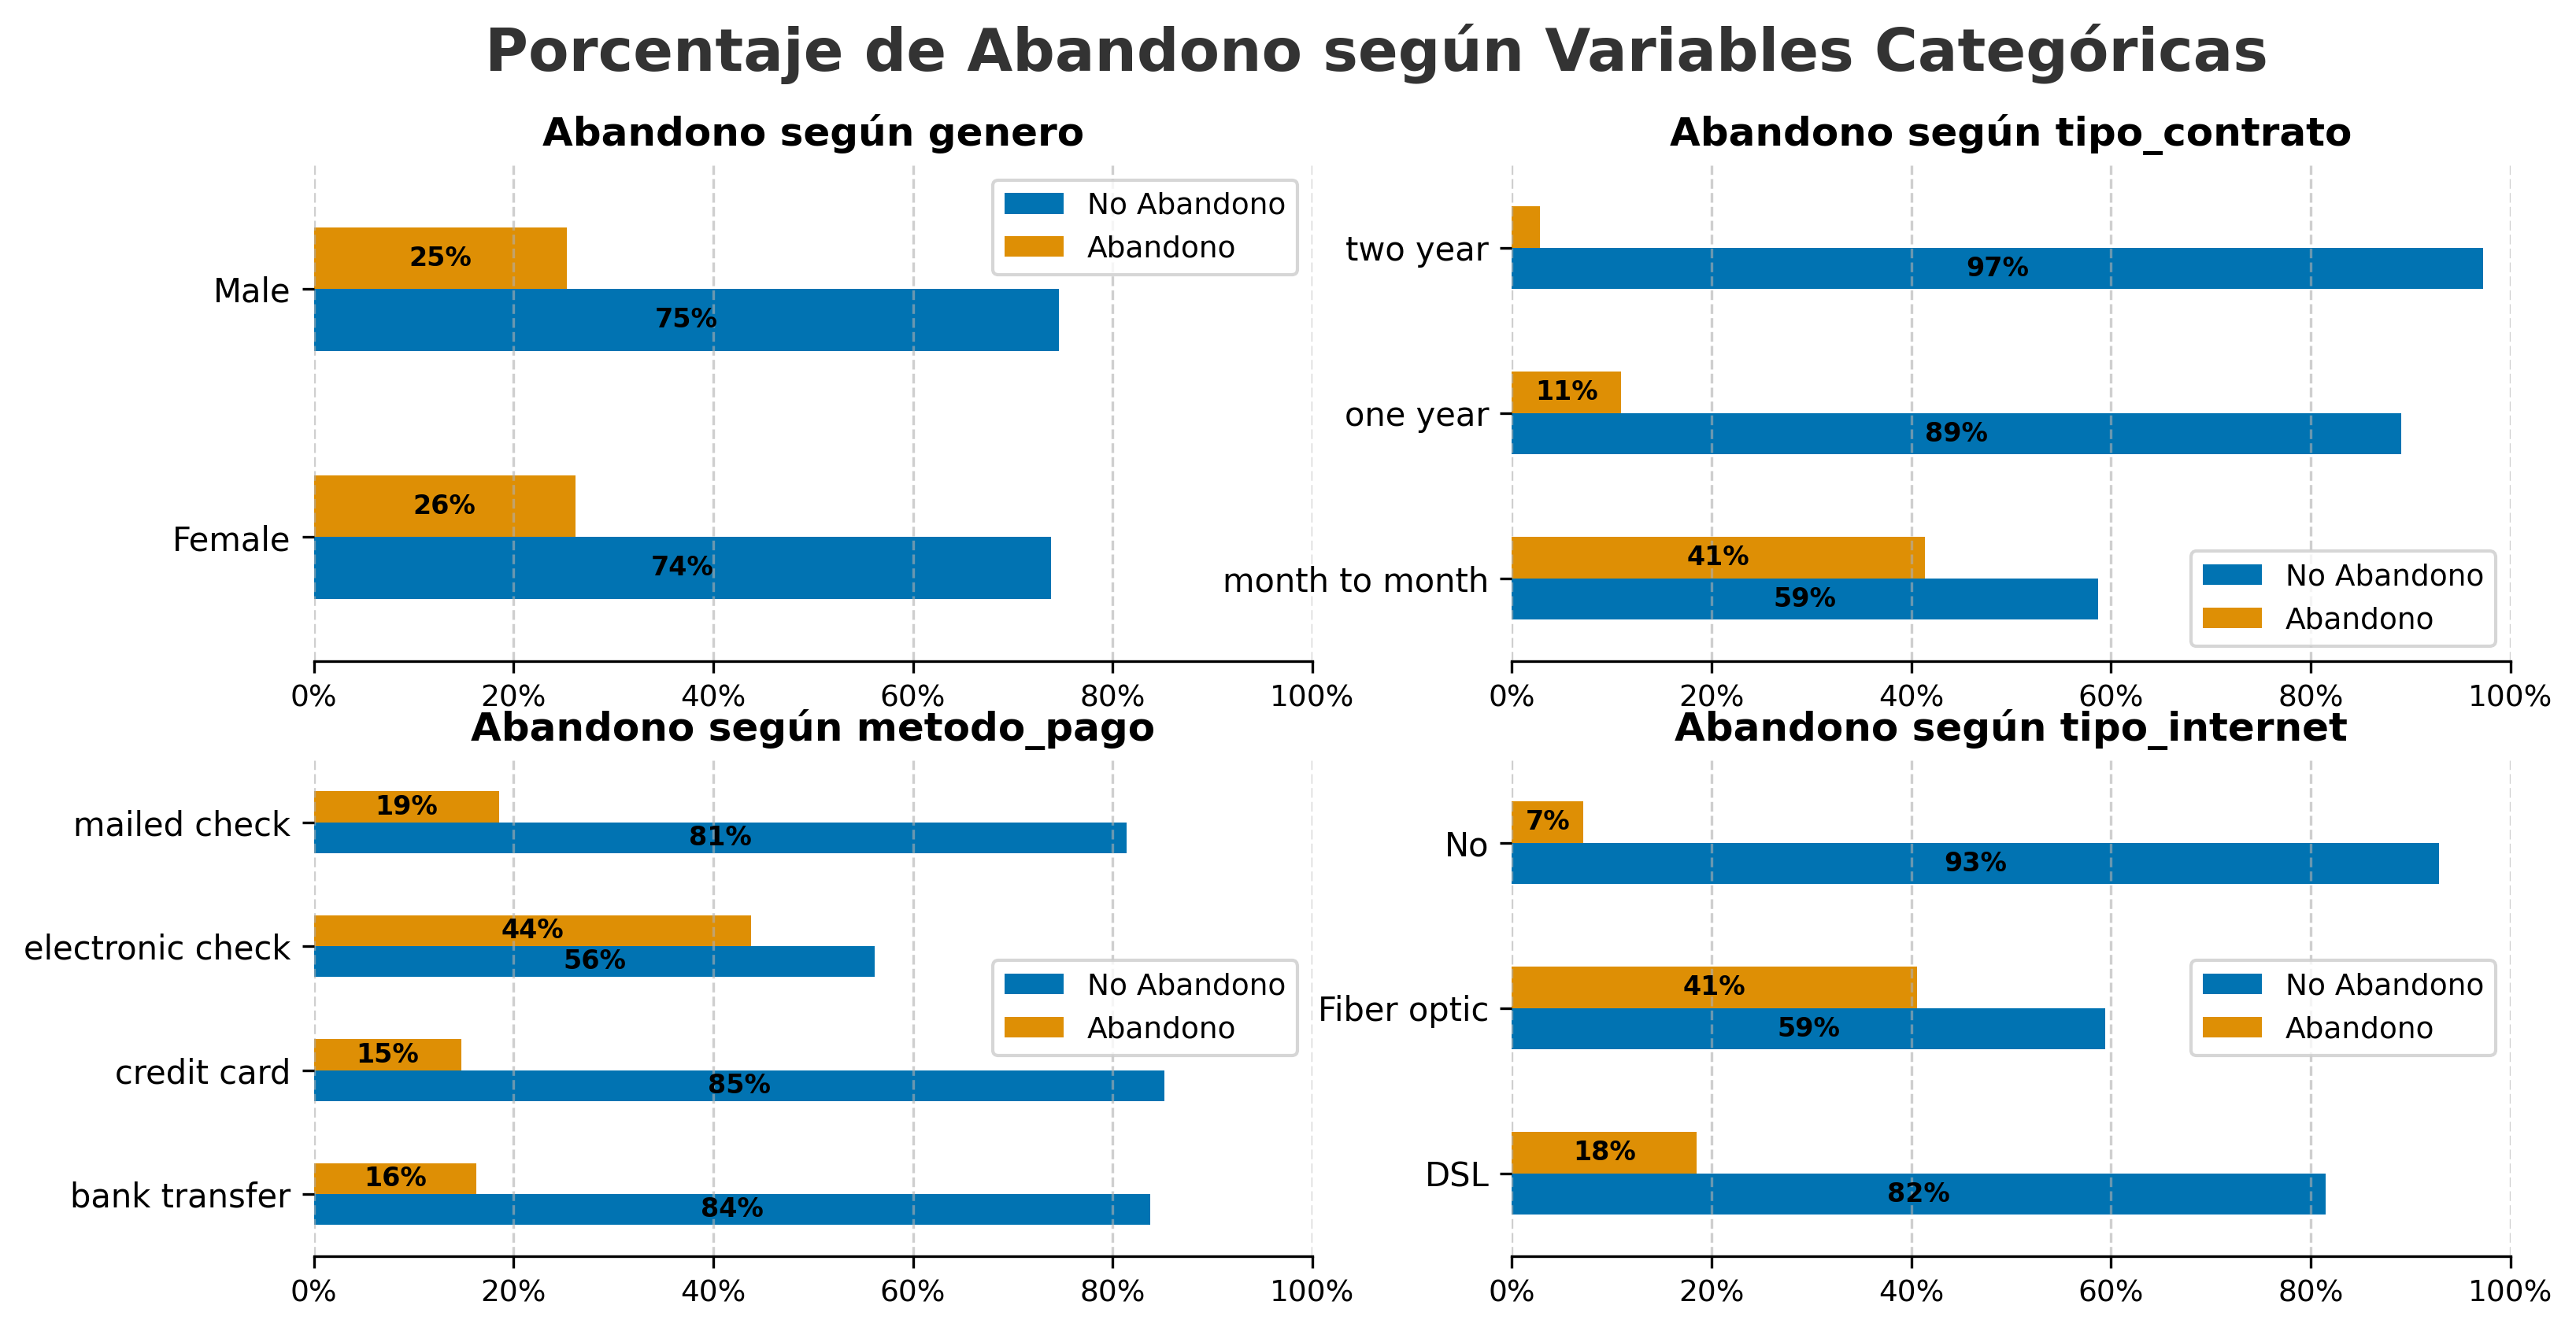

In [223]:
# @title Distribución de abandono por Variables Categoricas
Image('/content/drive/MyDrive/ALURA/CHALLENGE_2/Porcentaje_abandono_segun_categoria.png')

#### 3. Distribución de abandono por variables binarias

Este gráfico evaluó el comportamiento de abandono en servicios como:


*   Ciudadano Mayor.
*   Si tiene pareja.
*   Si tiene Hijos.
*   Cuenta con Servicio Telefonico.
*   Facturación eléctronica.



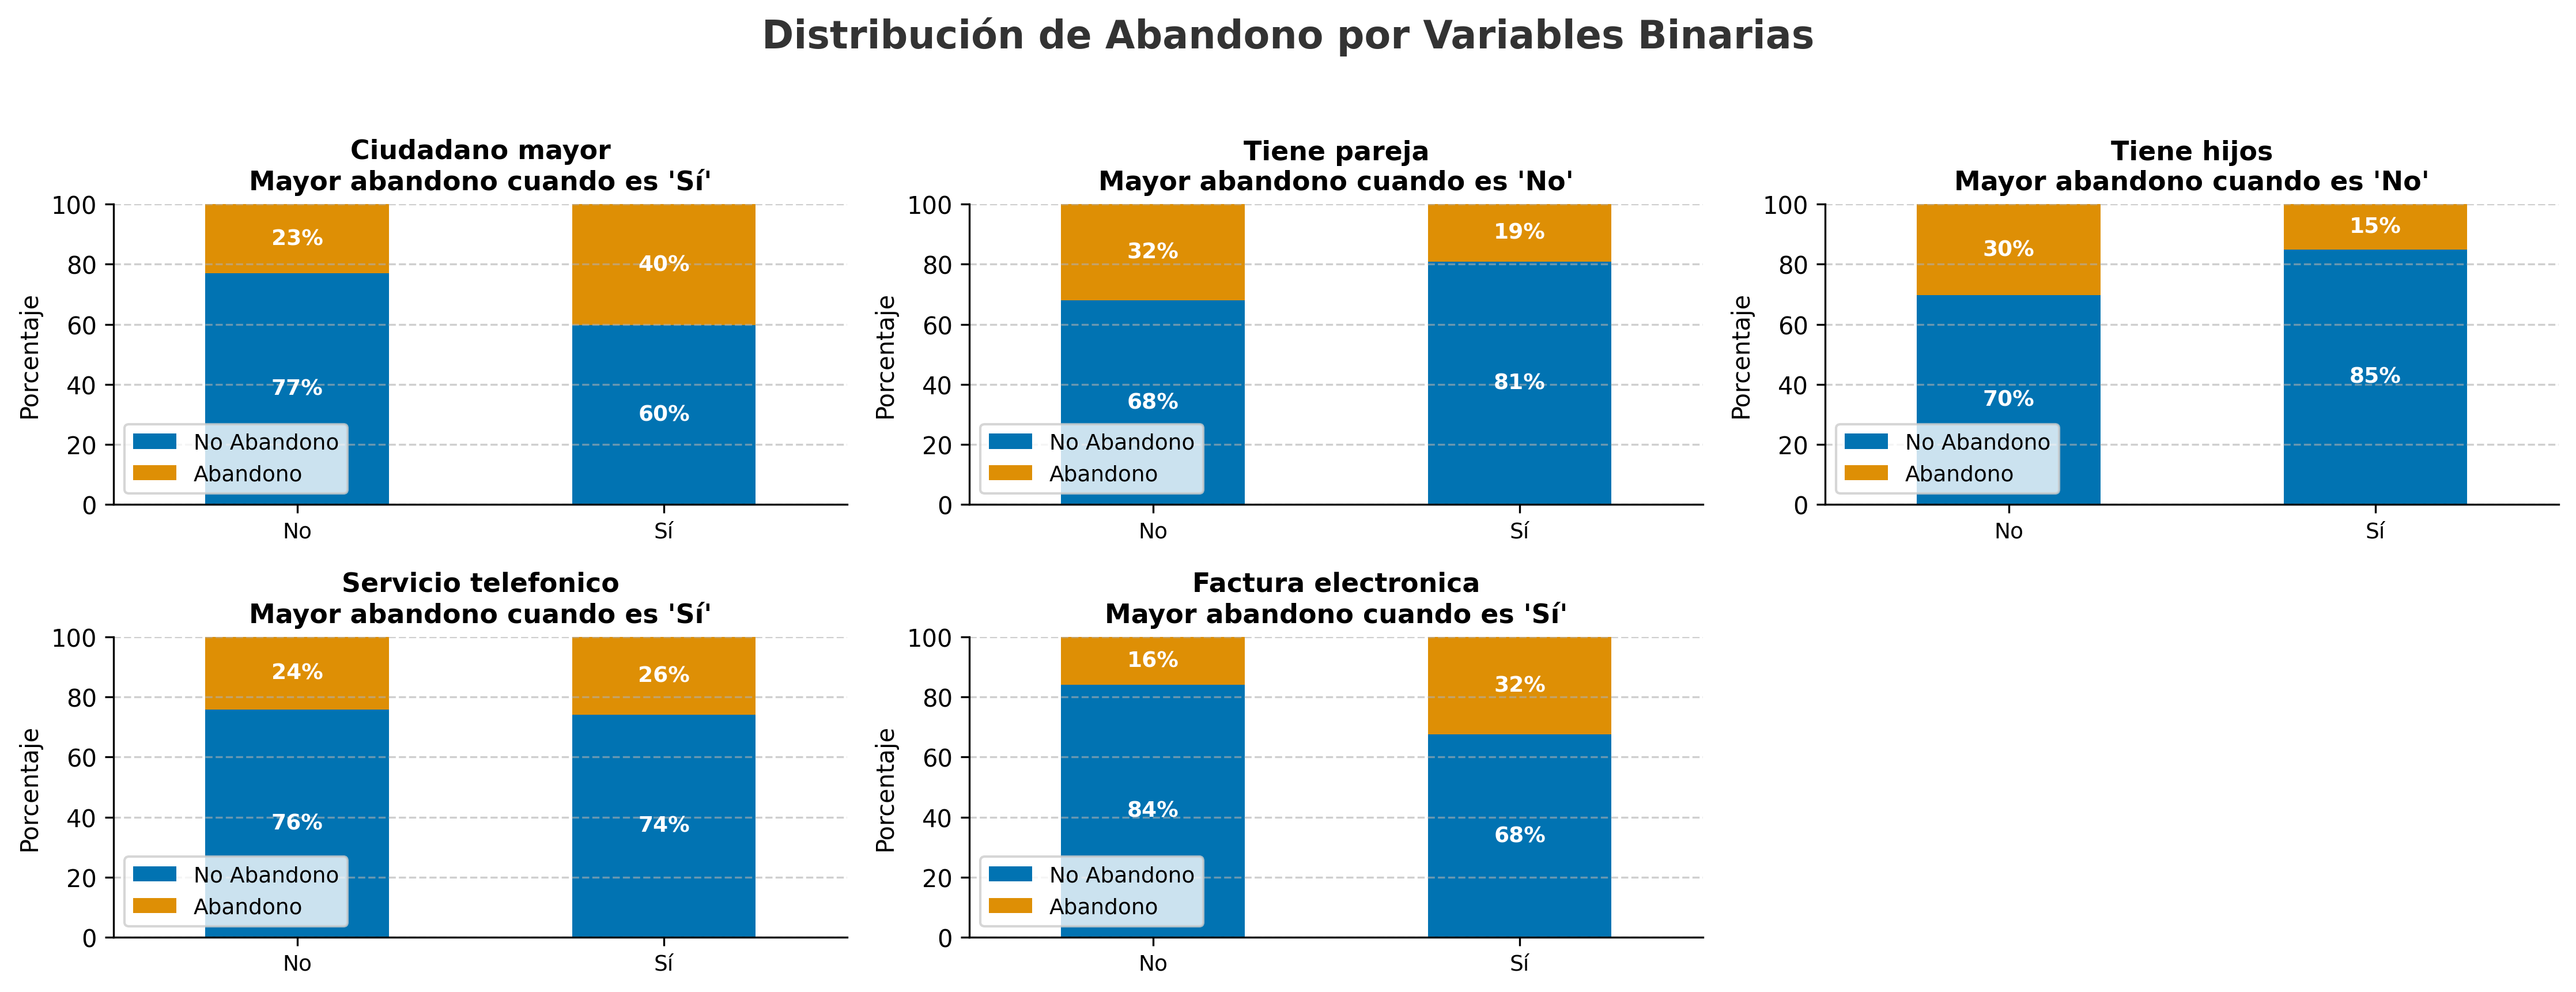

In [195]:
# @title Distribución de abandono por Variables Binarias
Image('/content/drive/MyDrive/ALURA/CHALLENGE_2/Distribucion_abandono_porvariablesbinarias.png')

#### 4. Porcentaje de abandono según rangos de variables numéricas

Se analizaron variables numéricas como:


*   Mesees en la empresa.
*   Cargos mensuales.
*   Cargos Totales (mensuales).
*   Cuentas diarias.

Insights:

El abandono es mayor en clientes con menos de 12 meses de permanencia.

Aquellos con cargos mensuales bajos presentan mayor abandono, posiblemente porque son usuarios nuevos con menor compromiso.

A mayor carga total acumulada, menor abandono, lo que indica que clientes antiguos tienen mayor lealtad.

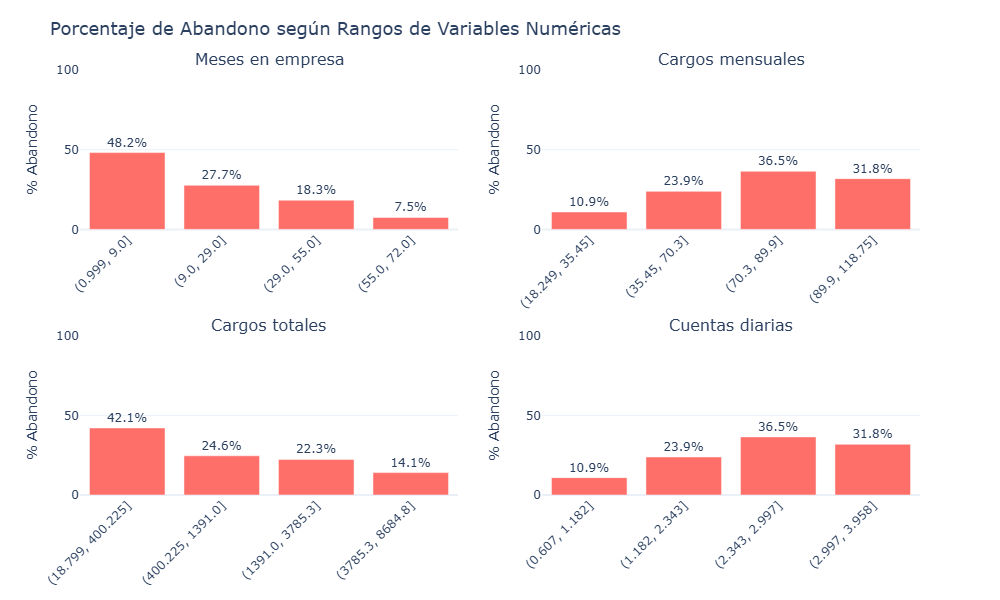

In [208]:
# @title Porcentaje de abandono según rangos de variables
Image('/content/drive/MyDrive/ALURA/CHALLENGE_2/Rango_variables_numericas.png')

#### 5.Mapa de calor de correlación entre variables numéricas

Se evaluaron correlaciones entre variables numéricas con un heatmap.

Insights:

*   Existe una fuerte correlación entre los cargos mensuales y los cargos totales.
*   El número de meses como cliente también se correlaciona positivamente con el cargo total.
*   No hay una correlación directa entre la variable "abandono" y las variables numéricas, lo que sugiere que el abandono depende de factores múltiples y requiere un análisis más profundo con modelos estadísticos o de Machine Learning.

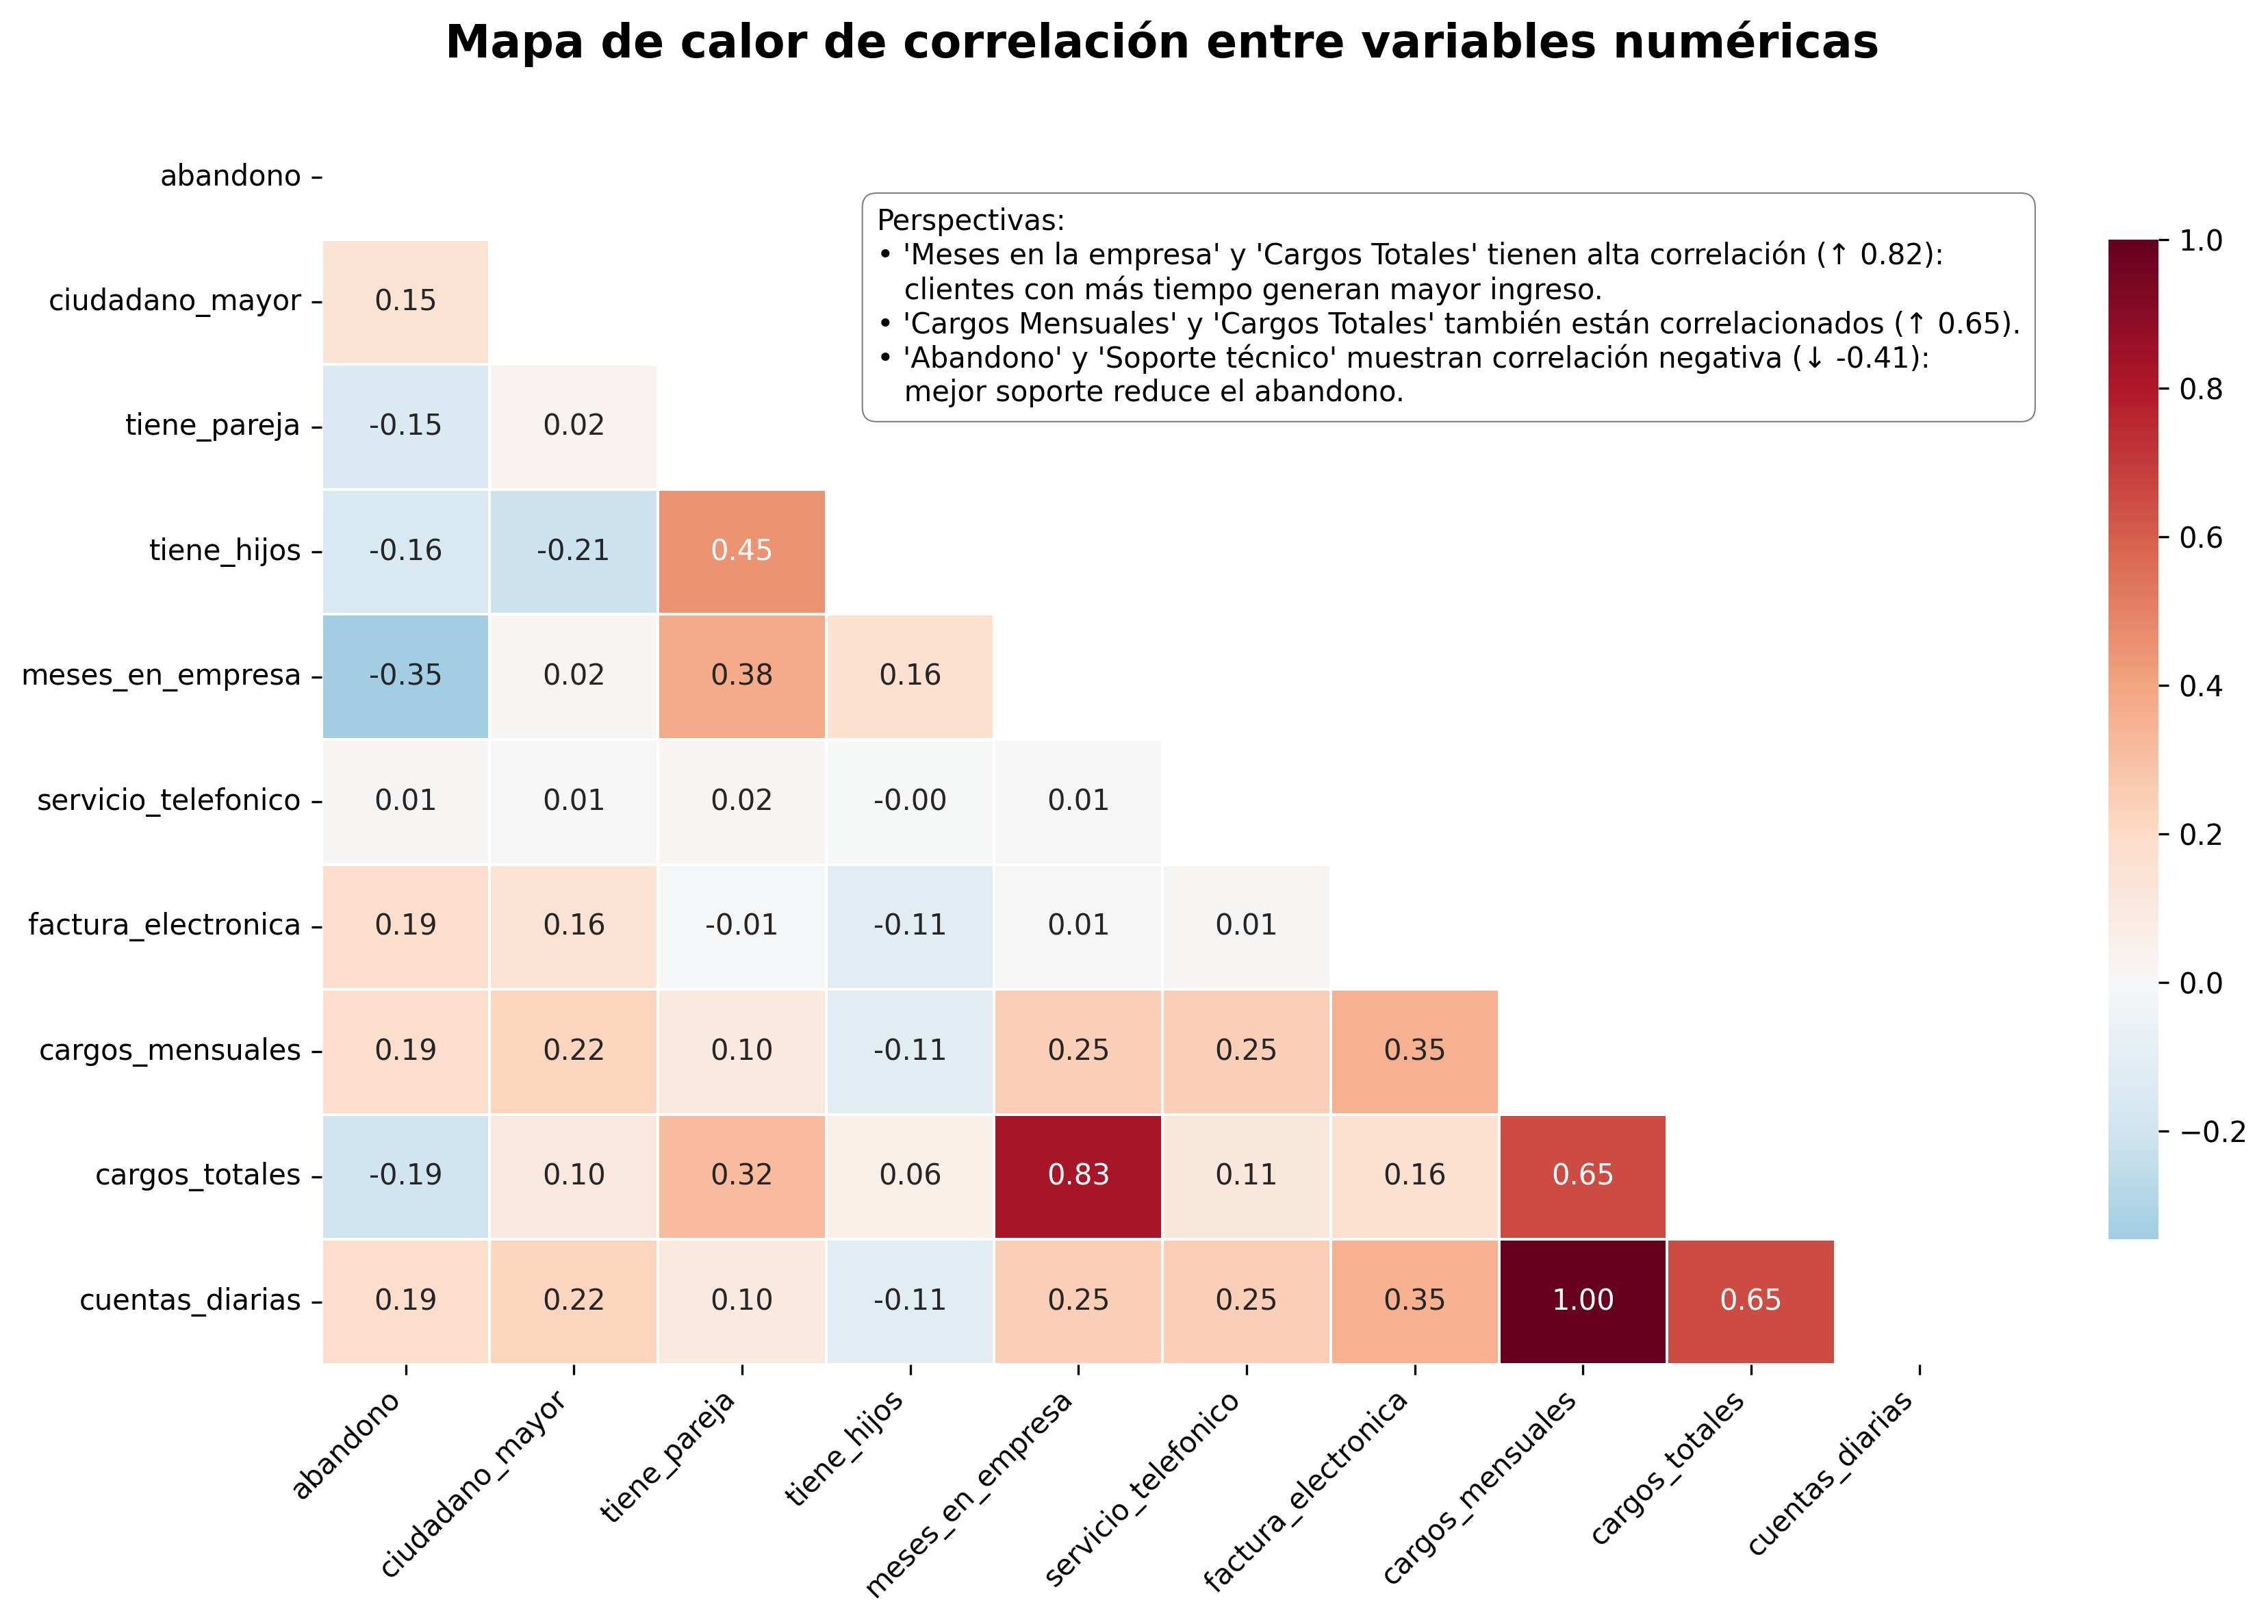

In [209]:
# @title Mapa de calor
Image('/content/drive/MyDrive/ALURA/CHALLENGE_2/Mapa_calor.png')

### 📌 Conclusiones

*  El porcentaje de clientes que abandonan el servicio es preocupante y requiere estrategias específicas de retención.
*   Las variables más influyentes en el abandono son el tipo de contrato, uso de servicios técnicos adicionales, y la forma de pago.
*   Las correlaciones indican que el tiempo con la empresa y los cargos totales están fuertemente relacionados, pero no directamente con el abandono, lo que sugiere que se requieren modelos más complejos para explicar el fenómeno.
*   La mayoría de los clientes que abandonan están en planes más económicos y sin servicios complementarios, lo que puede reflejar una mala experiencia del cliente o falta de valor percibido.



### ✅ Recomendaciones

*   🛡️ Implementar programas de fidelización para clientes con contrato mensual o cargos bajos.
*   📞 Ofrecer soporte técnico gratuito o simplificado a clientes nuevos como valor añadido.
*   💳 Revisar estrategias de medios de pago, ya que los que usan métodos automáticos tienen menor tasa de abandono.
*   📈 Aplicar modelos predictivos como árboles de decisión o random forest para anticipar abandono con base en múltiples variables.

